In [10]:
### Function Imports
from FX_Hedge_Functions import import_fx_data, plot_forex, direct_daily_rets, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics


In [11]:
### Load in FX Rate Data
all_forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
    'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
    'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
    'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
]
forex_pairs = ['GBPJPY=X', 'GBPCHF=X']
start_date = '2021-01-01'
forex_data = import_fx_data(forex_pairs, start_date)
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,GBPJPY=X,GBPCHF=X
896,2024-06-10,199.610001,1.14040
897,2024-06-11,199.843994,1.14096
898,2024-06-12,200.143005,1.14372
899,2024-06-13,200.630997,1.14400
900,2024-06-14,199.619003,1.14024


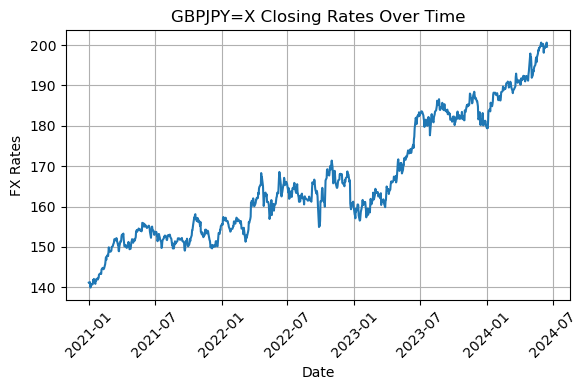

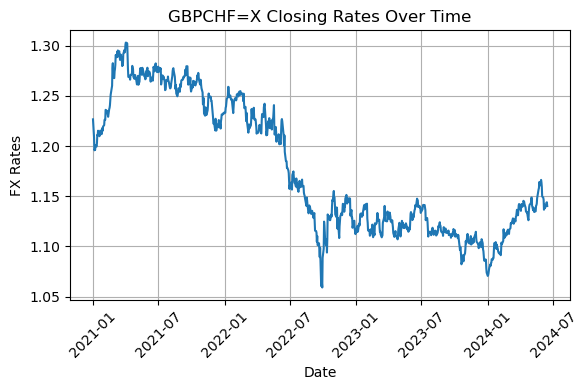

In [12]:
### Plot FX Rate Data
plot_forex(forex_data, forex_pairs)

In [13]:
# Call Function to Calculate Daily Returns
daily_returns = direct_daily_rets(forex_data)
print(daily_returns.head())


        Date  GBPJPY=X  GBPCHF=X
0 2021-01-04  0.000829 -0.014968
1 2021-01-05 -0.009373 -0.010321
2 2021-01-06 -0.000029  0.000811
3 2021-01-07  0.002937 -0.000460
4 2021-01-08  0.003406  0.003963


In [14]:
### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(forex_pairs, daily_returns)
print("Hedge Ratio:", hedge_ratio)

Hedge Ratio: 0.41097912748853815


In [15]:
### Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, forex_pairs, daily_returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))

Long Position Size:  1000
Short Position Size:  -410.9791
Recent Hedged Cumulative Returns:  895    1457.155991
896    1458.570112
897    1459.302372
898    1462.713624
899    1457.311461
dtype: float64
Recent Unhedged Cumulative Returns:  895    1414.269530
896    1415.927413
897    1418.045956
898    1421.503455
899    1414.333316
Name: GBPJPY=X, dtype: float64


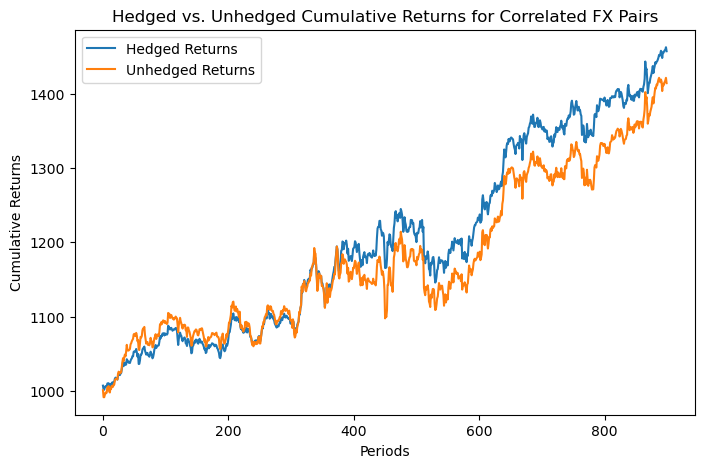

In [16]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)

In [17]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, daily_returns)

Metric                                  Hedged        Unhedged
Total Returns                         457.3115        414.3333
Annualized Returns                      4.5606          4.4094
Mean Return                          1202.3618       1179.1926
Standard Deviation                    127.9047        104.8799
Sharpe Ratio                          149.2275        178.4814

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 149.2275,
which means for every unit of risk, the hedged portfolio is generating 149.2275 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 178.4814,
indicating that for every unit of risk, the unhedged portfolio is generating 178.4814 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
